# How the Internet works?

- Each device has a globally unique IP address which is a 32 bit number. 
- Data is chopped up into reasonable sized packets (up to 65,535 bytes, but usually much smaller) and every packet has a header which contains the destination IP address.
- Every packet is routed independently and gets passed from one device to another until it reaches the destination. These devices are called routers.
- Each router keeps an address table that says, when it gets a packet for some destination address, which of its neighbors should it pass the packet on to. The routers are constantly talking to each other passing information about how they should update their routing tables.
- If some of the routers stop working, the rest of the routers talk to each other and start routing packets around in a different way so that packets still reach their intended destination if there is some path to get there. 
- At the destination, the packets are reassembled into the original data message.
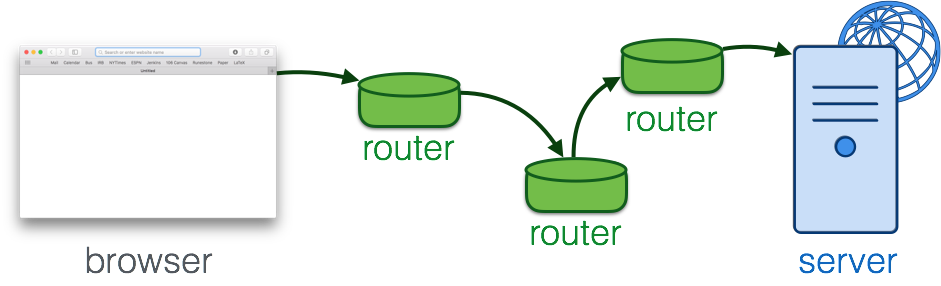

# Anatomy of URLs:
- URLs are used by browsers to identify what server to connect to and what page to launch.
- The overall structure of a URL is:
```<scheme>://<host>:<port>/<path>```
- **Scheme**: 
    - ```http/https/ftp/mailto```
- **Host**: 
    - Domain Name (The computer program looks up the IP address corresponding to the domain name using DNS)
    - It can also be an IP address.
- **Port**:
    - Optional. If omitted, port 80 is used by default.
    - Used on the receiving end to decide which computer program should get the data that has been received.
- **Path**:
    - Also optional. 
    - Specifies something about which page, or more generally which contents, are being requested.
<br>

For example, consider the url [https://github.com/presnick/runestone](https://github.com/presnick/runestone):
- ```https://``` says to use the *secure http* protocol.
- ```github.com``` says to connect to the server at *github.com*, which currently maps to the IP address ```192.30.252.130```. The connection will be made on the default port, which is ```443``` for https.
- ```/presnick/runestone``` says to ask the remote server for the page *presnick/runestone*. It is up to the remote server to decide how to map that to the contents of a file it has access to, or to some content that it generates on the fly.
<br>

- The url [http://blueserver.com/path?k=val](http://blueserver.com/path?k=val) is another example that we can consider. 
- The path here a bit different from [https://github.com/presnick/runestone](https://github.com/presnick/runestone) because it includes what are called **“query parameters”**, the information after the ```?```.

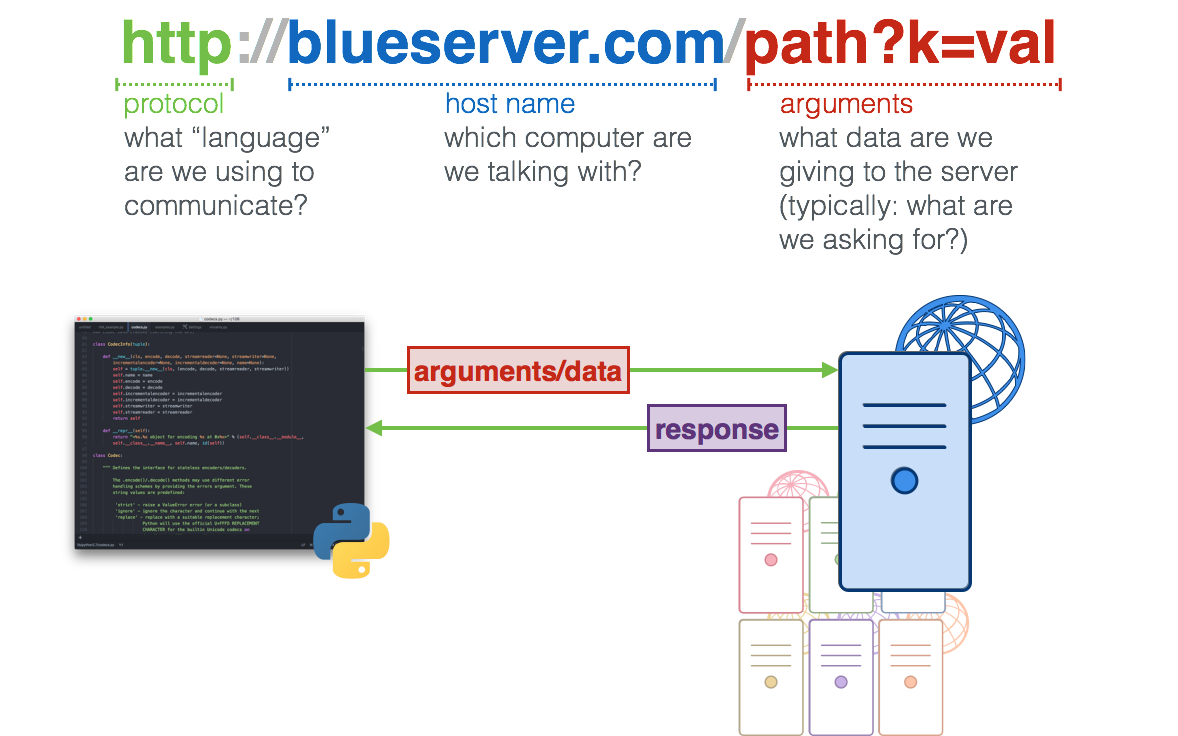

# The HTTP Protocol:
- A protocol specifies the order or rules in which two or more parties would communicate. 
- HTTP is the protocol that specifies how web browsers or other programs communicate with web servers. 
- One version of the formal specification, before it was later split into multiple documents, was IETF [RFC 2616](https://www.ietf.org/rfc/rfc2616.txt). It is **176 pages** long! 
- Fortunately, the basics are pretty easy to understand.
    - **Step 1**: the client makes a request to the server.
        - If the request is only to fetch data, ```GET <path>``` is sent by the client.
        - If the request is to send some data (e.g., a file upload, or some authentication information), ```POST``` is sent.
    - **In either case, the client sends some HTTP headers. These include:**
        - **Type** of the client program.
            - This allows the server to send back different things to small mobile devices than desktop browsers (a “responsive” website)
        - Any **cookies** that the server previously asked the client to hold onto.
            - This allows the server to continue previous interactions, rather than treating every request as stand-alone.
            - It also allows ad networks to place personalized ads.
    - After the HTTP headers, for a ```POST``` type communication, there is some data (the body of the request).
    
    - **Step 2**: the server responds to the client.
        - **The server first sends back some HTTP headers. These include:**
            - **Response code**:
                - To indicate if the request is fulfilled or not.
            - **Type of content**:
                - A description to indicate what is the content-type (e.g., text/html for html formatted text)
            - Any **cookies** it would like the client to hold onto and send back the next time it communicates with the server.
        - After the headers come the contents. This is the stuff that you would see if you ask to *“View Source”* in a browser.
